# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [2]:
X_train = X_train_bow_L1
X_test = X_test_bow_L1

# Basic training

In [3]:
softmax_model = LogisticRegression(multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9750
	- Micro F1 score: 0.9750
	- Macro F1 score: 0.9670
Score of on test are:
	- Accuracy score: 0.8670
	- Micro F1 score: 0.8670
	- Macro F1 score: 0.8261


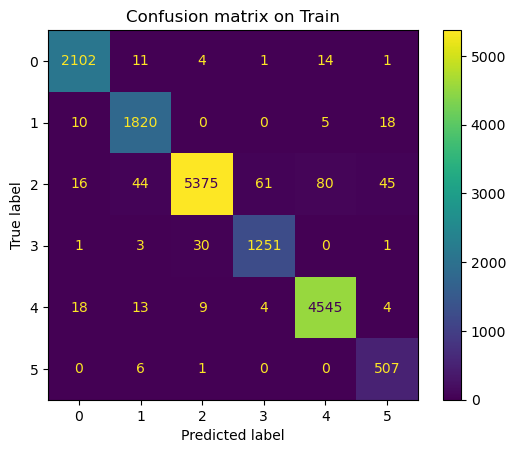

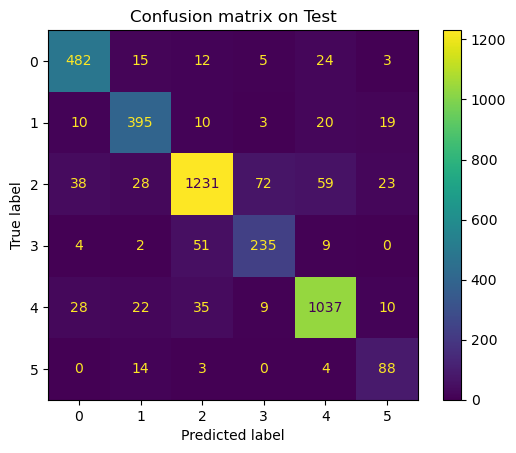

In [4]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

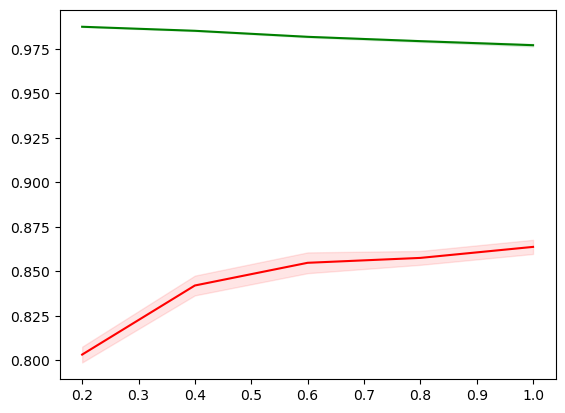

In [5]:
draw_learning_curve(softmax_model, X_train, y_train)

# Multiple tuning

## No regularization

In [6]:
softmax_model = LogisticRegression(penalty=None, solver='lbfgs', multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty=None)

Score of on train are:
	- Accuracy score: 0.9864
	- Micro F1 score: 0.9864
	- Macro F1 score: 0.9824
Score of on test are:
	- Accuracy score: 0.8510
	- Micro F1 score: 0.8510
	- Macro F1 score: 0.8093


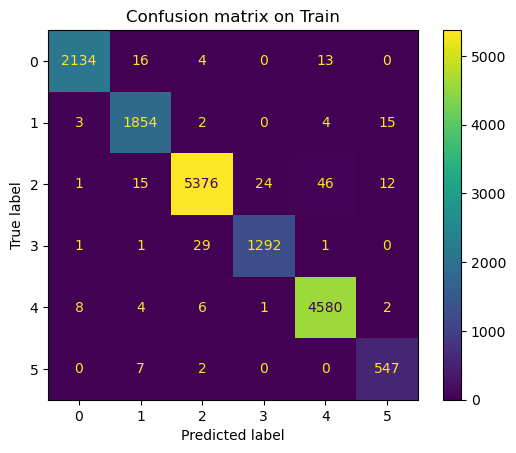

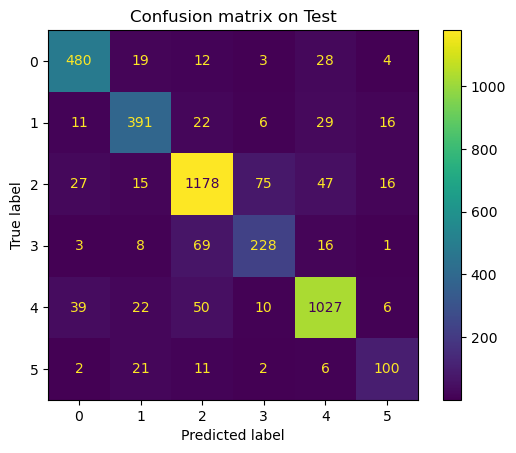

In [7]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

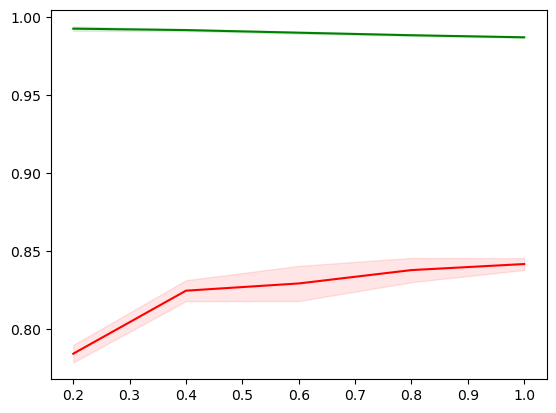

In [8]:
draw_learning_curve(softmax_model, X_train, y_train)

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [10]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.338625, 0.849625, 0.9138125, 0.97325, 0.9765, 0.978875]
[0.3386875000000001, 0.33831249999999996, 0.828375, 0.86675, 0.8651875, 0.8651249999999999, 0.8640625]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

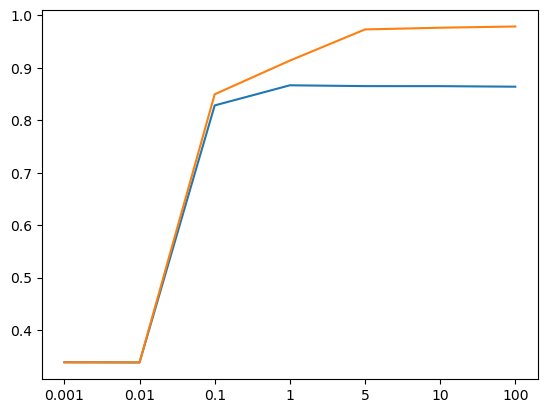

In [12]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 1 $, then we scope to $C=1$:

In [3]:
C_list = [0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]
[0.849625, 0.876, 0.893375, 0.913875, 0.9226875, 0.93025, 0.9383125, 0.9491875]
[0.8284375, 0.8565625000000001, 0.86625, 0.8670625, 0.865625, 0.86675, 0.866875, 0.865875]


[Text(0, 0, '0.1'),
 Text(1, 0, '0.25'),
 Text(2, 0, '0.5'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2')]

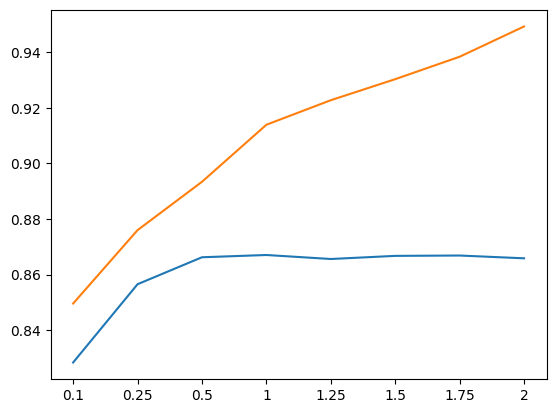

In [4]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=1$ to be the best model.

In [5]:
best_l1_softmax_model = LogisticRegression(C=1, penalty='l1', solver='saga', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9139
	- Micro F1 score: 0.9139
	- Macro F1 score: 0.8885
Score of on test are:
	- Accuracy score: 0.8728
	- Micro F1 score: 0.8728
	- Macro F1 score: 0.8328


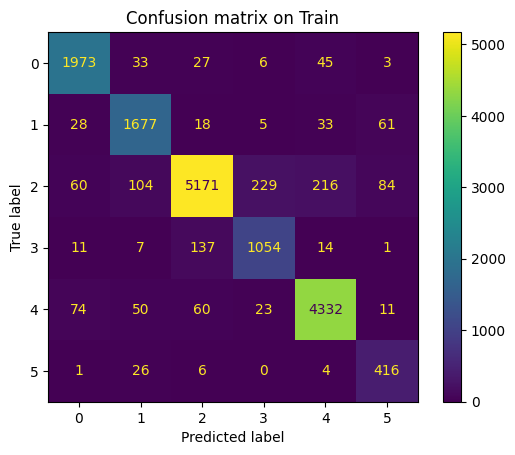

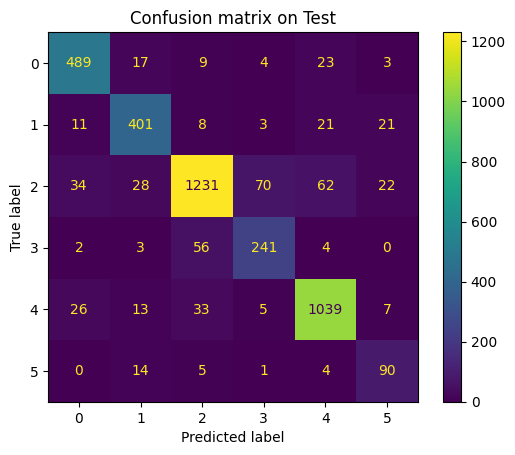

In [6]:
best_l1_softmax_model.fit(X_train, y_train)
evaluate_model(best_l1_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

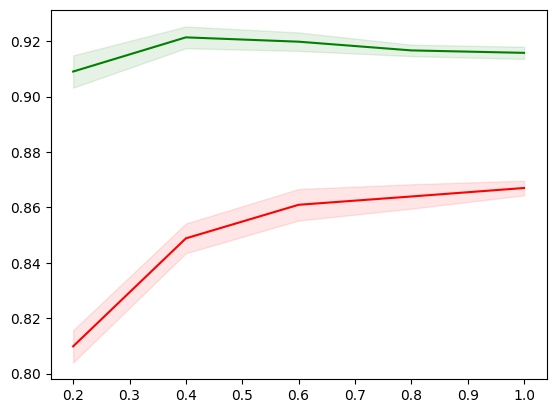

In [7]:
draw_learning_curve(best_l1_softmax_model, X_train, y_train)

## L2 regularization

In [13]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100, 200]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100, 200]
[0.3876875, 0.6714375, 0.91875, 0.975, 0.98475, 0.985375, 0.9863125, 0.9863125]
[0.36081250000000004, 0.6063125, 0.8438749999999999, 0.8637500000000001, 0.8614375000000001, 0.8579375, 0.8466250000000001, 0.8466875]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100'),
 Text(7, 0, '200')]

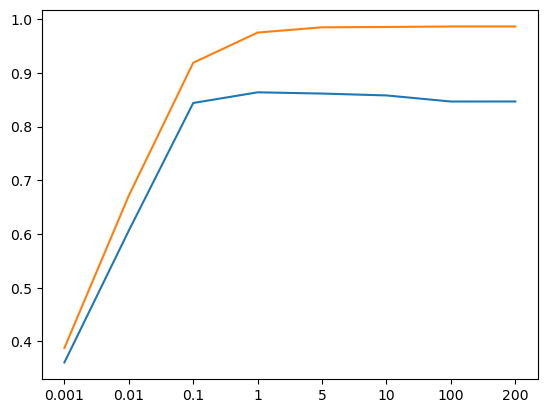

In [14]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C =1 $, then we scope to $C=1$:

In [8]:
C_list = [0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]
[0.9186875, 0.9495625, 0.96425, 0.9751875, 0.9776875, 0.98, 0.981625, 0.9825]
[0.844, 0.857, 0.8611875000000001, 0.8634375000000001, 0.863875, 0.8633124999999999, 0.8630625000000001, 0.8626875]


[Text(0, 0, '0.1'),
 Text(1, 0, '0.25'),
 Text(2, 0, '0.5'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2')]

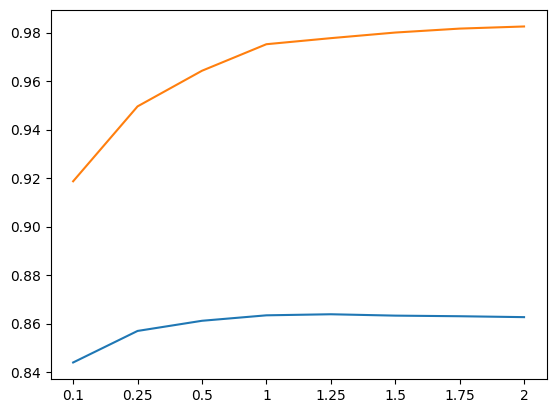

In [9]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

The valid scores are almost the same at every value, but we will choose value with lowest train score for generalization.

We choose $C=1$ to be the best model.

In [10]:
best_l2_softmax_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9752
	- Micro F1 score: 0.9752
	- Macro F1 score: 0.9671
Score of on test are:
	- Accuracy score: 0.8688
	- Micro F1 score: 0.8688
	- Macro F1 score: 0.8281


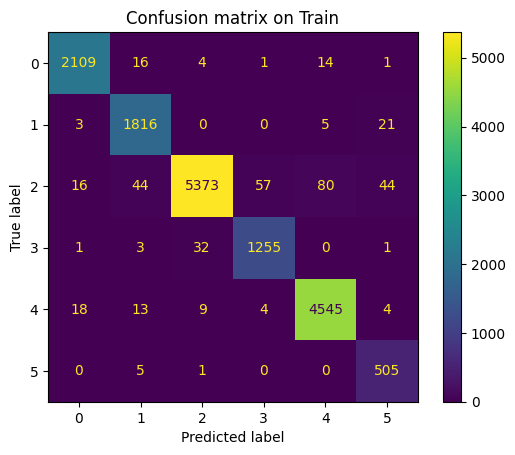

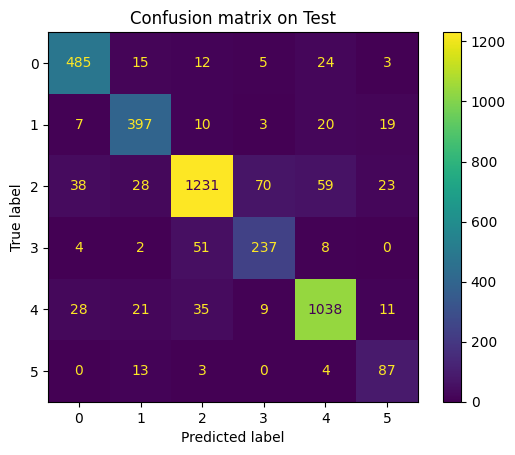

In [11]:
best_l2_softmax_model.fit(X_train, y_train)
evaluate_model(best_l2_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

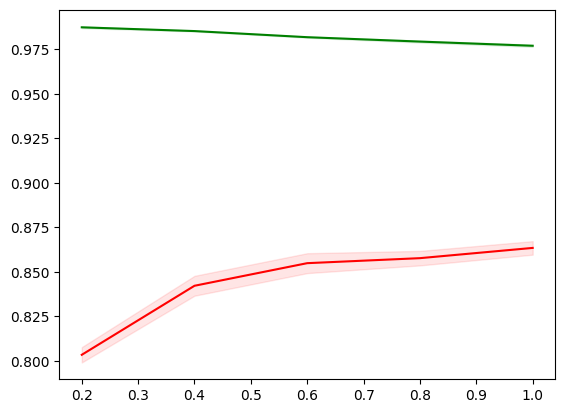

In [12]:
draw_learning_curve(best_l2_softmax_model, X_train, y_train)

## Elastic regularization

In [4]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=5,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [5]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

Bad hyperparameter:
C 0.001
C 0.01


In [13]:
dict_param = {
    'C' : np.logspace(0, 2, 5),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [14]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0     1.000000       0.1  0.864875
1     1.000000       0.3  0.864625
2     1.000000       0.5  0.865875
3     1.000000       0.7  0.865437
4     1.000000       0.9  0.866437
5     3.162278       0.1  0.864125
6     3.162278       0.3  0.864500
7     3.162278       0.5  0.865500
8     3.162278       0.7  0.865625
9     3.162278       0.9  0.866062
10   10.000000       0.1  0.864688
11   10.000000       0.3  0.863875
12   10.000000       0.5  0.864188
13   10.000000       0.7  0.864312
14   10.000000       0.9  0.864125
15   31.622777       0.1  0.864375
16   31.622777       0.3  0.863687
17   31.622777       0.5  0.863937
18   31.622777       0.7  0.863750
19   31.622777       0.9  0.863875
20  100.000000       0.1  0.864125
21  100.000000       0.3  0.864062
22  100.000000       0.5  0.864000
23  100.000000       0.7  0.864125
24  100.000000       0.9  0.863875


In [15]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(l1_ratio=0.9, multi_class='multinomial',
                   penalty='elasticnet', solver='saga') 0.8664375


In [16]:
best_en_softmax_model = LogisticRegression(C=1, l1_ratio=0.9,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

Score of on train are:
	- Accuracy score: 0.9182
	- Micro F1 score: 0.9182
	- Macro F1 score: 0.8940
Score of on test are:
	- Accuracy score: 0.8720
	- Micro F1 score: 0.8720
	- Macro F1 score: 0.8333


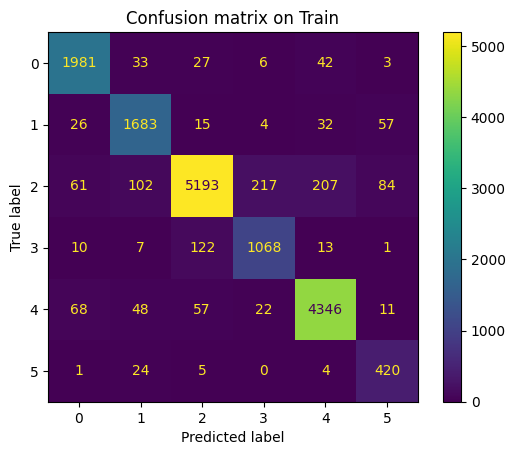

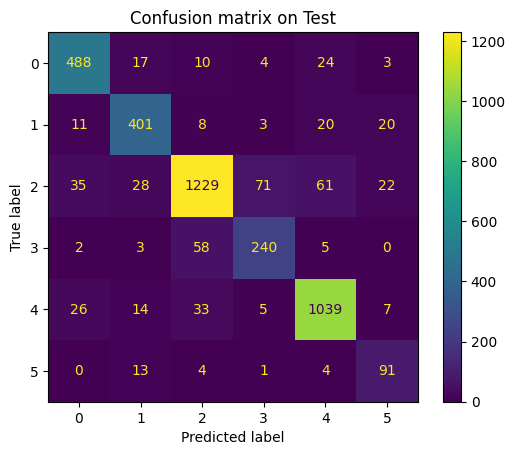

In [17]:
best_en_softmax_model.fit(X_train, y_train)
evaluate_model(best_en_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

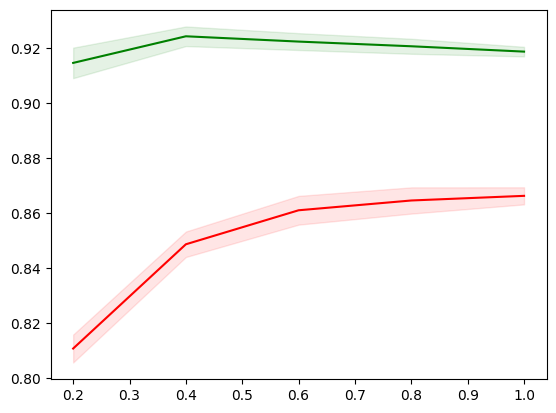

In [18]:
draw_learning_curve(best_en_softmax_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [19]:
best_softmax_model = best_l1_softmax_model

In [20]:
directory = "data/models/softmax/"

dump(best_softmax_model, directory + "best_softmax_bow_l1_model.joblib")

['data/models/softmax/best_softmax_bow_l1_model.joblib']